In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('concertriccir2.csv')

In [3]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [4]:
df = df.rename(columns=({'7.003345706103683010e-01':'X'}))

In [5]:
df = df.rename(columns=({'-2.470675778972781789e-01':'Y'}))

In [6]:
df = df.rename(columns=({'0.000000000000000000e+00':'class'}))

In [7]:
df.head()

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


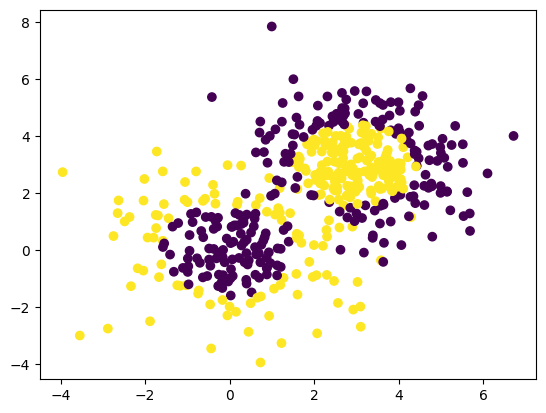

In [8]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [9]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [11]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
history1 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 14ms/step - loss: 0.7133 - accuracy: 0.4311 - val_loss: 0.6741 - val_accuracy: 0.4300
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 0.7044 - accuracy: 0.4461 - val_loss: 0.6688 - val_accuracy: 0.4900
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.4637 - val_loss: 0.6670 - val_accuracy: 0.5000
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6966 - accuracy: 0.4812 - val_loss: 0.6669 - val_accuracy: 0.5100
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6951 - accuracy: 0.4812 - val_loss: 0.6671 - val_accuracy: 0.5600
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4862 - val_loss: 0.6676 - val_accuracy: 0.5600
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4862 - val_loss: 0.6679 - val_accuracy: 0.5700
Epoch 8/200


In [14]:
model=Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization())
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3)                 9         
                                                                 
 batch_normalization (Batch  (None, 3)                 12        
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 2)                 8         
                                                                 
 batch_normalization_1 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (1

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history2 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 1s 17ms/step - loss: 0.8787 - accuracy: 0.4862 - val_loss: 1.9201 - val_accuracy: 0.5700
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.9074 - accuracy: 0.4737 - val_loss: 1.6209 - val_accuracy: 0.5600
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8880 - accuracy: 0.4561 - val_loss: 1.4032 - val_accuracy: 0.5600
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8517 - accuracy: 0.4687 - val_loss: 1.2403 - val_accuracy: 0.5500
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8307 - accuracy: 0.4862 - val_loss: 1.1141 - val_accuracy: 0.5300
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8167 - accuracy: 0.4887 - val_loss: 1.0195 - val_accuracy: 0.5100
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.8109 - accuracy: 0.4962 - val_loss: 0.9396 - val_accuracy: 0.4900
Epoch 8/200


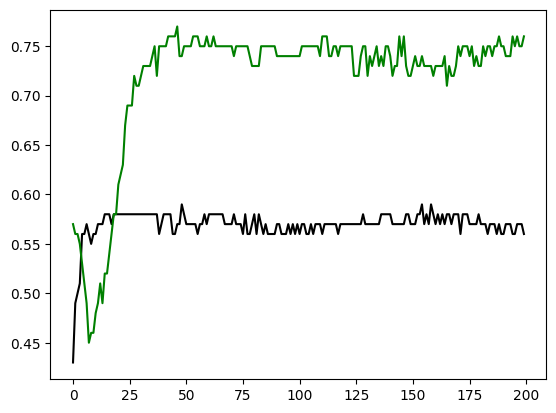

In [17]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')